<a href="https://colab.research.google.com/github/rikdantas/Algoritmos-Estruturas-Dados-II/blob/main/week06/week06_T1U2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unidade 2 Trabalho 1
### Aluno: Paulo Ricardo Dantas
### Matrícula: 20230000789

### Aluno: Ivamar Dantas Roque
### Matrícula: 20230000608
### Objetivo:
**Aplicar o conhecimento adquirido sobre grafos/redes na Semana 05.**

## Preparação inicial

In [2]:
# Importando bibliotecas

import itertools
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import seaborn as sns
%matplotlib inline

## Tarefa 1

### Criando dicionários com as partes dos carros

In [3]:
# Criando dicionários para cada conjunto de peças

# Dicionário contendo os freios e seus respectivos atributos
breaks_parts = {
    'Wildcore': {'Speed': 36, 'Cornering': 23, 'Power_Unit': 33, 'reliability': 22, 'avg_pit_stop': 0.59},
    'Suspense': {'Speed': 20, 'Cornering': 32, 'Power_Unit': 23, 'reliability': 21, 'avg_pit_stop': 0.37},
    'The Warden': {'Speed': 26, 'Cornering': 28, 'Power_Unit': 27, 'reliability': 25, 'avg_pit_stop': 0.43},
    'Onyx': {'Speed': 26, 'Cornering': 23, 'Power_Unit': 25, 'reliability': 50, 'avg_pit_stop': 0.49},
    'Axiom': {'Speed': 14, 'Cornering': 34, 'Power_Unit': 18, 'reliability': 15, 'avg_pit_stop': 0.67},
    'Crisis SL': {'Speed': 27, 'Cornering': 16, 'Power_Unit': 18, 'reliability': 19, 'avg_pit_stop': 0.51},
    'Essence': {'Speed': 14, 'Cornering': 13, 'Power_Unit': 12, 'reliability': 25, 'avg_pit_stop': 0.76},
    'Starter Breaks': {'Speed': 1, 'Cornering': 1, 'Power_Unit': 1, 'reliability': 1, 'avg_pit_stop': 1.0},
}

# Dicionário contendo as transmissões e seus respectivos atributos
gearbox_parts = {
    'Voyage': {'Speed': 23, 'Cornering': 28, 'Power_Unit': 22, 'reliability': 27, 'avg_pit_stop': 0},
    'Vector': {'Speed': 24, 'Cornering': 38, 'Power_Unit': 22, 'reliability': 36, 'avg_pit_stop': 0.55},
    'Kick Shift': {'Speed': 18, 'Cornering': 19, 'Power_Unit': 29, 'reliability': 19, 'avg_pit_stop': 0.45},
    'Verdict': {'Speed': 33, 'Cornering': 18, 'Power_Unit': 20, 'reliability': 30, 'avg_pit_stop': 0.63},
    'Spectrum': {'Speed': 20, 'Cornering': 25, 'Power_Unit': 21, 'reliability': 23, 'avg_pit_stop': 0.53},
    'Swiftcharge': {'Speed': 14, 'Cornering': 23, 'Power_Unit': 22, 'reliability': 16, 'avg_pit_stop': 0.71},
    'Switch-R-00': {'Speed': 12, 'Cornering': 13, 'Power_Unit': 11, 'reliability': 14, 'avg_pit_stop': 0.47},
    'Starter Gearbox': {'Speed': 1, 'Cornering': 1, 'Power_Unit': 1, 'reliability': 1, 'avg_pit_stop': 1.0},
}

# Dicionário contendo as asas traseiras e seus respectivos atributos
rear_wing_parts = {
    'Typhoon': {'Speed': 50, 'Cornering': 27, 'Power_Unit': 26, 'reliability': 23, 'avg_pit_stop': 0.53},
    'Transcendence': {'Speed': 24, 'Cornering': 22, 'Power_Unit': 36, 'reliability': 37, 'avg_pit_stop': 0.53},
    'Free Flare': {'Speed': 21, 'Cornering': 33, 'Power_Unit': 20, 'reliability': 22, 'avg_pit_stop': 0.37},
    'The Patron': {'Speed': 23, 'Cornering': 21, 'Power_Unit': 19, 'reliability': 37, 'avg_pit_stop': 0.61},
    'The Wasp': {'Speed': 16, 'Cornering': 24, 'Power_Unit': 23, 'reliability': 14, 'avg_pit_stop': 0.69},
    'The Matador': {'Speed': 19, 'Cornering': 16, 'Power_Unit': 18, 'reliability': 17, 'avg_pit_stop': 0.72},
    'Phantom-X': {'Speed': 26, 'Cornering': 15, 'Power_Unit': 12, 'reliability': 11, 'avg_pit_stop': 0.76},
    'Starter Rear Wing': {'Speed': 1, 'Cornering': 1, 'Power_Unit': 1, 'reliability': 1, 'avg_pit_stop': 1.0},
}

# Dicionário contendo as asas dianteiras e seus respectivos atributos
front_wing_parts = {
    'Virtue': {'Speed': 23, 'Cornering': 50, 'Power_Unit': 27, 'reliability': 24, 'avg_pit_stop': 0.49},
    'Thunderclap': {'Speed': 35, 'Cornering': 23, 'Power_Unit': 21, 'reliability': 33, 'avg_pit_stop': 0.55},
    'Trailblazer': {'Speed': 21, 'Cornering': 23, 'Power_Unit': 42, 'reliability': 20, 'avg_pit_stop': 0.57},
    'Zeno': {'Speed': 25, 'Cornering': 23, 'Power_Unit': 22, 'reliability': 26, 'avg_pit_stop': 0.53},
    'The Vagabond': {'Speed': 31, 'Cornering': 20, 'Power_Unit': 23, 'reliability': 21, 'avg_pit_stop': 0.35},
    'Feral Punch': {'Speed': 13, 'Cornering': 15, 'Power_Unit': 22, 'reliability': 21, 'avg_pit_stop': 0.73},
    'The Scout': {'Speed': 13, 'Cornering': 27, 'Power_Unit': 15, 'reliability': 14, 'avg_pit_stop': 0.73},
    'Starter Front Wing': {'Speed': 1, 'Cornering': 1, 'Power_Unit': 1, 'reliability': 1, 'avg_pit_stop': 1.0},
}

# Dicionário contendo as suspensões e seus respectivos atributos
suspension_parts = {
    'Sigma': {'Speed': 32, 'Cornering': 28, 'Power_Unit': 30, 'reliability': 29, 'avg_pit_stop': 0.39},
    'Presence': {'Speed': 23, 'Cornering': 26, 'Power_Unit': 24, 'reliability': 22, 'avg_pit_stop': 0.20},
    'Horizon': {'Speed': 22, 'Cornering': 36, 'Power_Unit': 24, 'reliability': 37, 'avg_pit_stop': 0.53},
    'Radiance': {'Speed': 25, 'Cornering': 17, 'Power_Unit': 26, 'reliability': 19, 'avg_pit_stop': 0.65},
    'Icon V3': {'Speed': 17, 'Cornering': 13, 'Power_Unit': 16, 'reliability': 23, 'avg_pit_stop': 0.54},
    'Rodeo': {'Speed': 23, 'Cornering': 22, 'Power_Unit': 15, 'reliability': 14, 'avg_pit_stop': 0.69},
    'The Equator': {'Speed': 20, 'Cornering': 19, 'Power_Unit': 18, 'reliability': 21, 'avg_pit_stop': 0.61},
    'Starter Suspension': {'Speed': 1, 'Cornering': 1, 'Power_Unit': 1, 'reliability': 1, 'avg_pit_stop': 1.0},
}

# Dicionário contendo os motores e seus respectivos atributos
engine_parts = {
    'Cloudroar': {'Speed': 26, 'Cornering': 24, 'Power_Unit': 50, 'reliability': 27, 'avg_pit_stop': 0.55},
    'Avalanche': {'Speed': 34, 'Cornering': 22, 'Power_Unit': 25, 'reliability': 21, 'avg_pit_stop': 0.35},
    'The Rover': {'Speed': 27, 'Cornering': 25, 'Power_Unit': 28, 'reliability': 24, 'avg_pit_stop': 0.53},
    'Twinburst': {'Speed': 16, 'Cornering': 29, 'Power_Unit': 18, 'reliability': 17, 'avg_pit_stop': 0.51},
    'Enigma': {'Speed': 16, 'Cornering': 13, 'Power_Unit': 23, 'reliability': 25, 'avg_pit_stop': 0.69},
    'Nova': {'Speed': 31, 'Cornering': 13, 'Power_Unit': 15, 'reliability': 16, 'avg_pit_stop': 0.71},
    'Brute Force': {'Speed': 21, 'Cornering': 19, 'Power_Unit': 36, 'reliability': 18, 'avg_pit_stop': 0.63},
    'Starter Engine': {'Speed': 1, 'Cornering': 1, 'Power_Unit': 1, 'reliability': 1, 'avg_pit_stop': 1.0},
}



### Combinando todas as partes

In [4]:
# Crie todas as combinações possíveis das partes (Setups)
combinations = itertools.product(
    breaks_parts.items(),
    gearbox_parts.items(),
    rear_wing_parts.items(),
    front_wing_parts.items(),
    suspension_parts.items(),
    engine_parts.items()
)

# Dicionário para armazenar os Team Scores para cada combinação
team_scores = {}

# Itere sobre as combinações e calcule os Team Scores
for combination in combinations:
    team_name_parts = [part_name for part_name, part in combination]
    team_name = "Team Score (" + " - ".join(team_name_parts) + ")"
    team_score = {}

    for metric in combination[0][1].keys():
        total_metric_value = sum(part[1][metric] for part in combination)
        team_score[metric] = total_metric_value

    team_scores[team_name] = team_score

len(team_scores)

262144

### Calculando o team score

In [5]:
# Criando um novo dicionario para armazenar as pontuações calculadas
team_scores_pontuacao = {}

# Itere sobre os Team Scores existentes e calcule a pontuação desejada
for team_name, metrics in team_scores.items():
    speed = metrics['Speed']
    cornering = metrics['Cornering']
    power_unit = metrics['Power_Unit']
    reliability = metrics['reliability']
    avg_pit_stop = metrics['avg_pit_stop']

    # Calcule a pontuação desejada
    pontuacao = speed + cornering + power_unit + reliability + (avg_pit_stop / 0.02)

    # Adicione a pontuação ao dicionário team_scores_pontuacao
    team_scores_pontuacao[team_name] = pontuacao

# Agora transformando o dicionário em lista
pontuacoes = list(team_scores_pontuacao.values())

### Histograma

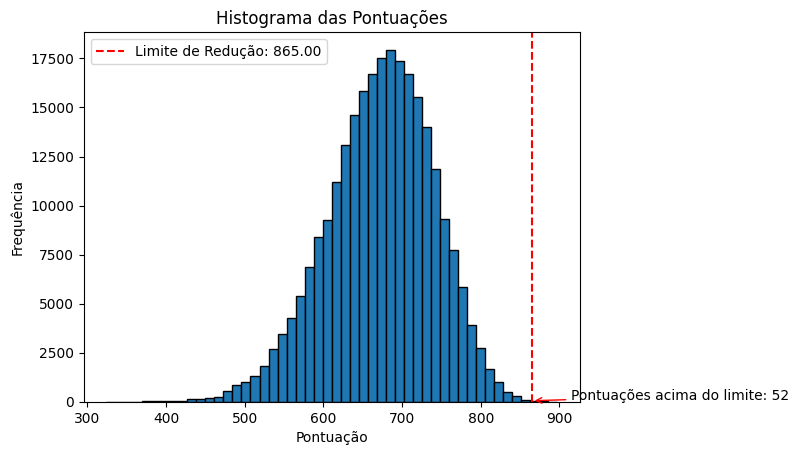

In [6]:
# Crie um histograma
plt.hist(pontuacoes, bins=50, edgecolor='k')
plt.xlabel('Pontuação')
plt.ylabel('Frequência')
plt.title('Histograma das Pontuações')

# Usando limite de redução igual a 865
limite_reducao = 865

# Calcule a contagem de pontuações acima do limite
pontuacoes_acima_do_limite = sum(1 for pontuacao in pontuacoes if pontuacao > limite_reducao)

plt.axvline(x=limite_reducao, color='r', linestyle='--', label=f'Limite de Redução: {limite_reducao:.2f}')
plt.legend()

# Anote o número de pontuações acima do limite no gráfico
plt.annotate(f'Pontuações acima do limite: {pontuacoes_acima_do_limite}', xy=(limite_reducao, 50), xytext=(limite_reducao + 50, 80),
             arrowprops=dict(arrowstyle='->', color='red'))

plt.show()

## Tarefa 2

### Aplicando o filtro

In [7]:
# Crie um grafo para armazenar as associações
G = nx.Graph()

# Crie todas as combinações possíveis das partes
combinations = itertools.product(
    breaks_parts.items(),
    gearbox_parts.items(),
    rear_wing_parts.items(),
    front_wing_parts.items(),
    suspension_parts.items(),
    engine_parts.items()
)

# Dicionário para armazenar as Team Scores e as peças usadas em cada um
team_scores = {}

# Itere sobre as combinações e calcule os Team Scores
for combination in combinations:
    team_name_parts = [part_name for part_name, part in combination]
    team_name = "Team Score (" + " - ".join(team_name_parts) + ")"
    team_score = {}

    for metric in combination[0][1].keys():
        total_metric_value = sum(part[1][metric] for part in combination)
        team_score[metric] = total_metric_value

    # Verifique se a pontuação é maior que limite_reducao
    pontuacao = team_score['Speed'] + team_score['Cornering'] + team_score['Power_Unit'] + team_score['reliability'] + (team_score['avg_pit_stop'] / 0.02)
    if pontuacao > limite_reducao:
        # Adicione as peças ao nó do Team Score
        G.add_node(team_name, parts=team_name_parts)
        # Associe o Team Score ao nó
        G.nodes[team_name]['score'] = pontuacao

### Criando o grafo

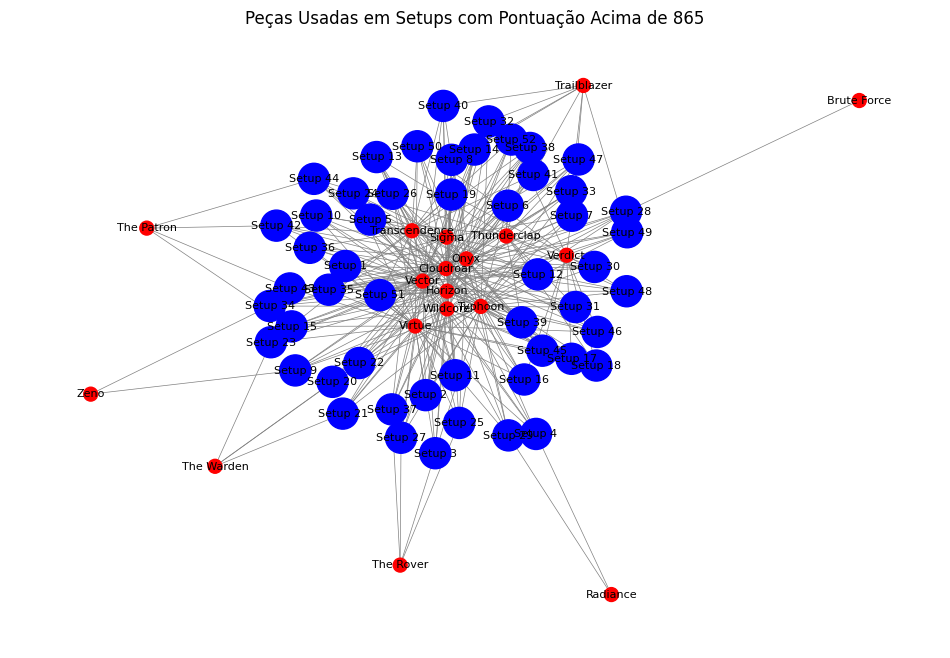

In [8]:
# Crie um novo grafo para representar as peças usadas
pieces_graph = nx.Graph()

# Itere sobre os nós de "Team Score" que atendem ao critério de pontuação acima do limite de redução
setup_count = 1
for node_name, data in G.nodes(data=True):
    if data['score'] > limite_reducao:
        # Obtenha a lista de peças usadas neste Team Score
        used_pieces = data['parts']

        # Renomeie o Team Score para "Setup x"
        setup_name = f"Setup {setup_count}"
        pieces_graph.add_node(setup_name, color='blue', size=500)

        # Adicione as peças como nós vermelhos
        pieces_graph.add_nodes_from(used_pieces, color='red', size=100)

        # Conecte as peças ao novo nome do setup
        for piece in used_pieces:
            pieces_graph.add_edge(setup_name, piece)

        setup_count += 1

# Organize o grafo para uma melhor visualização
pos = nx.spring_layout(pieces_graph, k=0.3)

# Extraia os tamanhos e cores dos nós
node_sizes = [data['size'] for _, data in pieces_graph.nodes(data=True)]
node_colors = [data['color'] for _, data in pieces_graph.nodes(data=True)]

# Desenhe o grafo
plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(pieces_graph, pos, node_color=node_colors, node_size=node_sizes)
nx.draw_networkx_labels(pieces_graph, pos, font_size=8, font_color='black')
nx.draw_networkx_edges(pieces_graph, pos, edge_color='gray', width=0.5, arrows=False)
plt.title(f"Peças Usadas em Setups com Pontuação Acima de {limite_reducao}")
plt.axis('off')
plt.show()

### Função de Densidade de Probabilidade

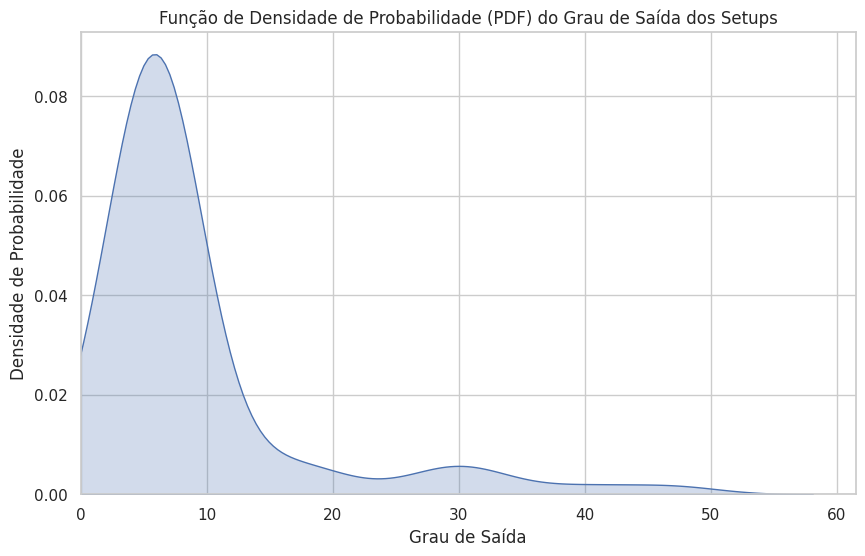

In [9]:
out_degrees = dict(pieces_graph.degree)

# Converter os graus de saída em uma lista
out_degree_list = list(out_degrees.values())

# Usar Seaborn para criar o gráfico da Função de Densidade de Probabilidade (PDF)
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.kdeplot(out_degree_list, color="b", fill=True)
plt.title("Função de Densidade de Probabilidade (PDF) do Grau de Saída dos Setups")
plt.xlabel("Grau de Saída")
plt.ylabel("Densidade de Probabilidade")

# Limitar o eixo x a valores positivos
plt.xlim(left=0)

plt.show()


A Função de Densidade de Probabilidade (PDF, Probability Density Function) é um conceito estatístico que descreve a distribuição de probabilidade de uma variável aleatória contínua. Em outras palavras, a PDF representa a probabilidade de que a variável aleatória assuma um valor específico em um intervalo contínuo.

No contexto do grau de saída dos vértices em um grafo, a PDF mostra como os diferentes valores de grau de saída estão distribuídos em todo o conjunto de vértices. Isso ajuda a entender a frequência com que ocorrem diferentes graus de saída nos nós do grafo.

Quando você cria um gráfico da Função de Densidade de Probabilidade (PDF) para o grau de saída dos vértices de um grafo, você está plotando a distribuição de probabilidade dos graus de saída. Isso pode fornecer informações úteis sobre a estrutura do grafo, como a presença de nós altamente conectados (alto grau de saída) ou a presença de nós pouco conectados (baixo grau de saída). Em termos simples, a PDF ajuda a visualizar a variabilidade e a distribuição dos graus de saída nos nós do grafo.

## Tarefa 3

In [18]:
# Instalando nxviz
!pip install networkx nxviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 7.2 MB/s eta 0:00:00


### Criando dicionários com as garrafinhas (boosts)

In [16]:
# Criando um dicionário para adicionar os boosts e seus respectivos atributos
# Atributos possíveis: Speed, Cornering, Power_Unit, Reliability, Pit_Stop, Overtaking, Defending, Race_Start, Tyre_Management

garrafinha = {
    'Tsar': { 'defending': 10, 'tyre_management': 15, 'cornering': 15 },
    'Frost': { 'tyre_management': 25,'race_start': 15,'reliability': 10 },
    'Tulip': { 'defending': 10, 'reliability': 20, 'pit_stop': 20 },
    'Dragon': { 'overtaking': 20, 'tyre_management': 15, 'power_unit': 15 },
    'Kawaii': { 'race_start': 15, 'cornering': 20, 'pit_stop': 15 },
    'Pretzel': { 'tyre_management': 25, 'power_unit': 15, 'pit_stop': 10 },
    'Vice': { 'speed': 10, 'power_unit': 15, 'reliability': 25 },
    'Schooner': { 'defending': 10, 'reliability': 25, 'pit_stop': 15 },
    'Dijin': { 'defending': 15, 'cornering': 15, 'reliability': 20 },
    'Oud': { 'overtaking': 15, 'cornering': 10, 'pit_stop': 25 },
    'Eternal Flame': { 'overtaking': 25, 'tyre_management': 10, 'reliability': 15 },
    'Eagle': { 'tyre_management': 20, 'reliability': 15, 'pit_stop': 15  },
    'Iron Force': { 'tyre_management': 10, 'power_unit': 20, 'reliability': 20 },
    'Lumberjack': { 'defending': 15, 'tyre_management': 10, 'reliability': 25 },
    'Cranberry': { 'overtaking': 20, 'defending': 20, 'reliability': 10 },
    'Butterfly': { 'tyre_management': 20, 'power_unit': 25, 'pit_stop': 5 },
    'Tune-in': { 'speed': 10, 'cornering': 15, 'pit_stop': 25 },
    'Self-Control': { 'tyre_management': 5, 'speed': 5, 'reliability': 5 },
    'Warrior': { 'overtaking': 5, 'defending': 5, 'speed': 10 },
    'Ballast': { 'race_start': 5, 'cornering': 10, 'pit_stop': 10 },
    'Instinct': { 'race_start': 10, 'power_unit': 15, 'reliability': 5 },
    'Downforce': { 'defending': 15, 'tyre_management': 15, 'cornering': 5 },
    'Hex': { 'overtaking': 20, 'speed': 15, 'pit_stop': 5 },
    'Eggception': { 'defending': 15, 'power_unit': 10, 'pit_stop': 25 },
    'Rooster': { 'overtaking': 20, 'race_start': 20, 'power_unit': 10 },
    'Cuppa': { 'overtaking': 10, 'race_start': 20, 'cornering': 20 },
    'Street Shark': { 'overtaking': 10, 'race_start': 25, 'speed': 15 },
    'Herald': { 'overtaking': 10, 'race_start': 25, 'cornering': 15 },
    'Prince': { 'defending': 10, 'pit_stop': 20, 'cornering': 20 },
    'Unstoppable': { 'overtaking': 25, 'speed': 15, 'power_unit': 10 },
    'Dead Fast': { 'tyre_management': 5, 'speed': 25, 'power_unit': 20 },
    'Gladiator': { 'defending': 25, 'race_start': 15, 'power_unit': 10 },
    'Taurus': { 'overtaking': 5, 'speed': 20, 'power_unit': 25 },
    'Merlion': { 'speed': 15, 'cornering': 25, 'pit_stop': 10 },
    'Samba': { 'speed': 5, 'power_unit': 25, 'pit_stop': 20 },
    'Caveira': { 'overtaking': 15, 'speed': 25, 'power_unit': 10 },
    'Fogos': { 'overtaking': 15, 'race_start': 15, 'speed': 20 },
    'Movember': { 'defending': 15, 'tyre_management': 10, 'cornering': 25 },
    'Palmeira': { 'defending': 20, 'tyre_management': 20, 'race_start': 10 },
    'Nazar': { 'tyre_management': 15, 'race_start': 20, 'reliability': 15 },
    'Aderencia': { 'race_start': 10, 'cornering': 25, 'reliability': 15 },
    'Arco-iris': { 'defending': 25, 'race_start': 5, 'speed': 20 },
    'Eclipse': { 'overtaking': 15, 'speed': 25, 'pit_stop': 10 },
    'Rena': { 'defending': 20, 'cornering': 10, 'pit_stop': 20 }
}


### Criando o grafo da tarefa 3

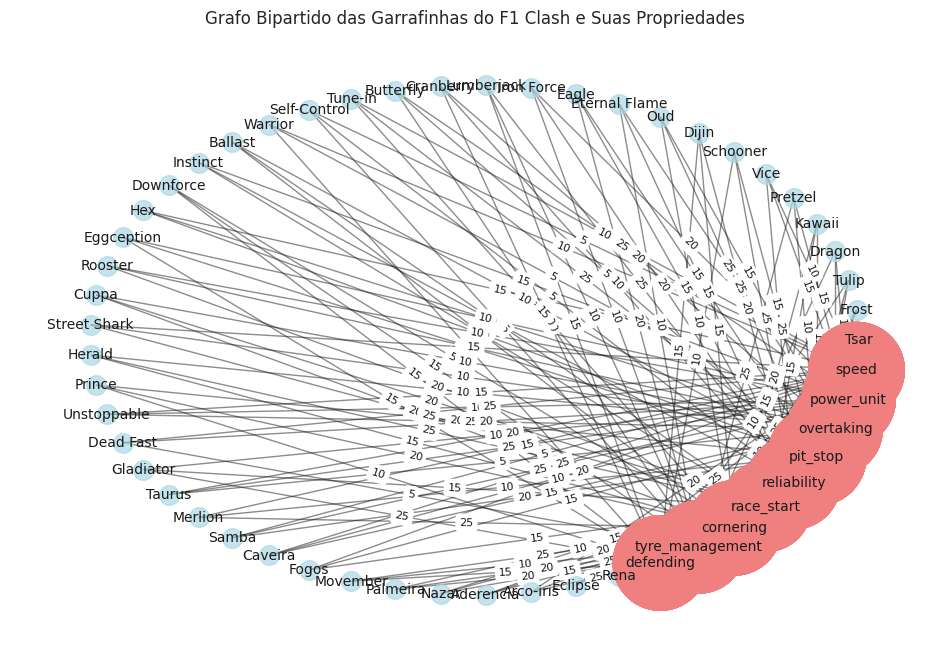

In [17]:
# Crie um objeto grafo bipartido
G = nx.Graph()

# Separe os vértices em dois grupos: Garrafinhas e Propriedades
garrafinhas = [nome for nome in garrafinha.keys()]
propriedades = [prop for props in garrafinha.values() for prop in props]

# Adicione os vértices aos grupos
G.add_nodes_from(garrafinhas, bipartite=0)
G.add_nodes_from(propriedades, bipartite=1)

# Crie as arestas entre Garrafinhas e suas Propriedades correspondentes
for garrafinha_nome, props in garrafinha.items():
    for prop, valor in props.items():
        G.add_edge(garrafinha_nome, prop, weight=valor)

# Calcule o tamanho dos vértices das Propriedades com base no "Out Degree"
prop_size = [G.degree(prop, weight='weight') for prop in propriedades]

# Configure o layout
pos = nx.circular_layout(G)

# Crie um dicionário para mapear as arestas às informações de "Out Degree"
edge_labels = {(garrafinha, prop): G[garrafinha][prop]['weight'] for garrafinha, prop in G.edges()}

# Desenhe o grafo
plt.figure(figsize=(12, 8))

# Desenhe os nós do grupo "Garrafinhas" com tamanho fixo
nx.draw_networkx_nodes(G, pos, nodelist=garrafinhas, node_size=200, node_color='lightblue', alpha=0.7)

# Ajuste o tamanho dos nós do grupo "Propriedades" com base no "Out Degree"
node_size = [G.degree(prop, weight='weight') * 20 for prop in propriedades]
nx.draw_networkx_nodes(G, pos, nodelist=propriedades, node_size=node_size, node_color='lightcoral', alpha=0.7)

# Desenhe as arestas
nx.draw_networkx_edges(G, pos, alpha=0.5)

# Adicione rótulos
nx.draw_networkx_labels(G, pos, font_size=10)

# Adicione rótulos para as arestas (Out Degree)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.title("Grafo Bipartido das Garrafinhas do F1 Clash e Suas Propriedades")
plt.axis('off')
plt.show()

O grafo bipartido acima representa as garrafinhas do jogo F1 Clash e suas propriedades correspondentes. Os vértices do grupo 'Garrafinhas' são representados em azul, enquanto os vértices do grupo 'Propriedades' são representados em vermelho.
As arestas entre as garrafinhas e as propriedades indicam a relação entre elas, com a espessura das arestas representando a intensidade da relação
O tamanho dos vértices das propriedades é proporcional ao grau de saída dos vértices, refletindo a importância das propriedades no desempenho das garrafinhas no jogo F1 Clash.

## Tarefa 4 (Incompleta)

In [11]:
# Criando um dicionário com os pilotos e seus atributos

drivers = {
    'Max Verstappen': { 'overtaking': 97, 'defending': 86, 'qualifying': 99, 'race_start': 89, 'tyre_management': 94 },
    'Charles Leclerc': { 'overtaking': 93, 'defending': 99, 'qualifying': 97, 'race_start': 87, 'tyre_management': 89 },
    'Fernando Alonso': { 'overtaking': 99, 'defending': 92, 'qualifying': 89, 'race_start': 97, 'tyre_management': 88 },
    'Lewis Hamilton': { 'overtaking': 81, 'defending': 86, 'qualifying': 89, 'race_start': 94, 'tyre_management': 90 },
    'Lando Norris': { 'overtaking': 99, 'defending': 95, 'qualifying': 99, 'race_start': 99, 'tyre_management': 99 },
    'George Russell': { 'overtaking': 95, 'defending': 90, 'qualifying': 91, 'race_start': 83, 'tyre_management': 86 },
    'Sergio Perez': { 'overtaking': 85, 'defending': 96, 'qualifying': 89, 'race_start': 91, 'tyre_management': 84 },
    'Carlos Sainz': { 'overtaking': 84, 'defending': 85, 'qualifying': 95, 'race_start': 90, 'tyre_management': 91 },
    'Lance Stroll': { 'overtaking': 92, 'defending': 83, 'qualifying': 87, 'race_start': 94, 'tyre_management': 89 },
    'Pierre Gasly': { 'overtaking': 88, 'defending': 93, 'qualifying': 83, 'race_start': 85, 'tyre_management': 96 },
}